# Preprocessing

I have saved the datasets as numpy arrays by running the save_Dataset.py file . In this notebook , I have performed basic exploratory analysis to answer question 1.

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys
import os
sys.path.insert(0, os.path.abspath('..'))
from latexify import latexify, format_axes
from watermark  import watermark

### Print package versions

In [2]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib -d

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.25.0

numpy     : 1.26.4
pandas    : 2.2.2
matplotlib: 3.8.4



## Loading Training Data and Testing Data

In [3]:
# Load the .npy files from the parent directory
X_train = np.load(os.path.join('..', 'Saved_Dataset', 'X_train.npy'))
y_train = np.load(os.path.join('..', 'Saved_Dataset', 'y_train.npy'))

X_test = np.load(os.path.join('..', 'Saved_Dataset', 'X_test.npy'))
y_test = np.load(os.path.join('..', 'Saved_Dataset', 'y_test.npy'))


In [4]:
X_train

array([[[ 1.19648   , -0.1606898 , -0.740178  ],
        [ 1.22203   , -0.2672951 , -0.7717485 ],
        [ 1.22311   , -0.4338634 , -0.7678422 ],
        ...,
        [ 0.4974957 , -0.2795907 , -0.2029592 ],
        [ 0.5064167 , -0.286091  , -0.2564634 ],
        [ 0.5609918 , -0.302237  , -0.2553743 ]],

       [[ 0.253887  ,  0.6446213 ,  0.7305601 ],
        [ 0.2547409 ,  0.6470096 ,  0.7330282 ],
        [ 0.256914  ,  0.6468081 ,  0.7354798 ],
        ...,
        [ 0.2489302 ,  0.642803  ,  0.7323693 ],
        [ 0.2503708 ,  0.6447095 ,  0.7369245 ],
        [ 0.2513104 ,  0.6440663 ,  0.735841  ]],

       [[ 0.9736077 , -0.1844755 , -0.2821974 ],
        [ 0.9760866 , -0.1867793 , -0.2848794 ],
        [ 0.977865  , -0.191836  , -0.2891687 ],
        ...,
        [ 0.9779202 , -0.1834941 , -0.2829651 ],
        [ 0.9796224 , -0.1832831 , -0.279844  ],
        [ 0.9775468 , -0.1833646 , -0.2764387 ]],

       ...,

       [[ 0.1943966 ,  0.5317094 ,  0.834933  ],
        [ 0

## Basic EDA

In [5]:
print(X_train.shape , y_train.shape)

(126, 500, 3) (126,)


In [6]:
print(X_test.shape , y_test.shape)

(54, 500, 3) (54,)


### Analysis

X_train: (126, 500, 3)

126 samples <br>
500 time steps <br>
3 features per time step <br>
y_train: (126,) <br>
<br>
126 labels (one for each sample)

X_test : (54,500,3)
54 samples <br>
500 time steps <br>
3 features per time step <br>
y_train: (54,) <br>
<br>
54 labels (one for each sample)



In [7]:
# Reshape X_train from (126, 500, 3) to (126, 1500) where 1500 is the product of 500 time steps and 3 features.
# This is done to convert the 3D array to 2D array so that it can be fed to the model.

num_samples, num_time_steps, num_features = X_train.shape
X_train_flat = X_train.reshape(num_samples, num_time_steps * num_features)

In [8]:
num_samples, num_time_steps, num_features = X_test.shape
X_test_flat = X_test.reshape(num_samples, num_time_steps * num_features)

In [9]:
# check the shape of the new X_train and X_test
print(X_train_flat.shape , X_test_flat.shape)

(126, 1500) (54, 1500)


In [10]:
sensor_labels = ['acc_x', 'acc_y', 'acc_z'] 

# Generate feature names
feature_names = [
    f"{sensor_labels[sensor]}_Timestep{time_step+1}" 
    for sensor in range(num_features) 
    for time_step in range(num_time_steps)
]

print(len(feature_names))


1500


In [11]:
# Features dataframe
df_X_train = pd.DataFrame(X_train_flat, columns=feature_names)
display(df_X_train)


,acc_x_Timestep1,acc_x_Timestep2,acc_x_Timestep3,acc_x_Timestep4,acc_x_Timestep5,acc_x_Timestep6,acc_x_Timestep7,acc_x_Timestep8,acc_x_Timestep9,acc_x_Timestep10,...,acc_z_Timestep491,acc_z_Timestep492,acc_z_Timestep493,acc_z_Timestep494,acc_z_Timestep495,acc_z_Timestep496,acc_z_Timestep497,acc_z_Timestep498,acc_z_Timestep499,acc_z_Timestep500
0,1.196480,-0.160690,-0.740178,1.222030,-0.267295,-0.771748,1.223110,-0.433863,-0.767842,1.119198,...,-0.238900,0.497496,-0.279591,-0.202959,0.506417,-0.286091,-0.256463,0.560992,-0.302237,-0.255374
1,0.253887,0.644621,0.730560,0.254741,0.647010,0.733028,0.256914,0.646808,0.735480,0.256767,...,0.727602,0.248930,0.642803,0.732369,0.250371,0.644710,0.736924,0.251310,0.644066,0.735841
2,0.973608,-0.184475,-0.282197,0.976087,-0.186779,-0.284879,0.977865,-0.191836,-0.289169,0.979638,...,-0.282725,0.977920,-0.183494,-0.282965,0.979622,-0.183283,-0.279844,0.977547,-0.183365,-0.276439
3,0.604887,-0.268411,-0.243389,0.642071,-0.260653,-0.280545,0.684042,-0.214045,-0.339541,0.783312,...,-0.628329,0.967623,-0.387469,-0.552678,1.028450,-0.394081,-0.464217,1.024582,-0.343248,-0.366899
4,0.717060,-0.020637,-0.108587,0.770530,-0.061851,-0.124144,0.780222,-0.046953,-0.119134,0.775849,...,-0.059822,0.731536,-0.162198,-0.049890,0.762215,-0.176539,-0.038009,0.764438,-0.205092,-0.028247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1.244197,-0.306974,-0.157324,1.268493,-0.241280,-0.126646,1.172693,-0.024558,-0.156810,1.157399,...,-0.168069,0.883440,-0.010817,-0.189794,0.910628,-0.013317,-0.200829,1.000665,-0.037908,-0.182720
122,0.930001,0.165556,0.371158,0.929049,0.165434,0.371020,0.926187,0.164835,0.376642,0.926449,...,0.449956,0.779744,0.431682,0.448030,0.780962,0.432075,0.447899,0.780401,0.435006,0.453407
123,0.194397,0.531709,0.834933,0.193816,0.531905,0.833790,0.190757,0.533298,0.829131,0.188486,...,0.806681,0.188955,0.560670,0.809995,0.186853,0.561524,0.811341,0.187728,0.563739,0.816337
124,0.784794,-0.259732,-0.231750,0.802820,-0.215132,-0.227644,0.725054,-0.206418,-0.209528,0.739537,...,-0.326054,0.654097,-0.140727,-0.286077,0.626860,-0.274884,-0.245594,0.605259,-0.329214,-0.195257


In [12]:
# labels dataframe
df_y_train = pd.DataFrame(y_train, columns=["Label"])
display(df_y_train)

,Label
0,2
1,6
2,5
3,2
4,2
...,...
121,1
122,4
123,6
124,2


# Question 1
Q1. Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

**Answer:**
The following 6x3 subplot shows the accelerometer data (x,y,z)*("WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING", "LAYING") for one sample.Along with one combined plot to compare different activities.

In [13]:
# mapping class labels to activity names , as provided in the dataset documentation
classes = {1: "WALKING", 2: "WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6: "LAYING"}

# extracting one sample for each activity class
activity_samples = {}
for activity_class, activity_name in classes.items():
    activity_samples[activity_name] = X_train[y_train == activity_class][0]


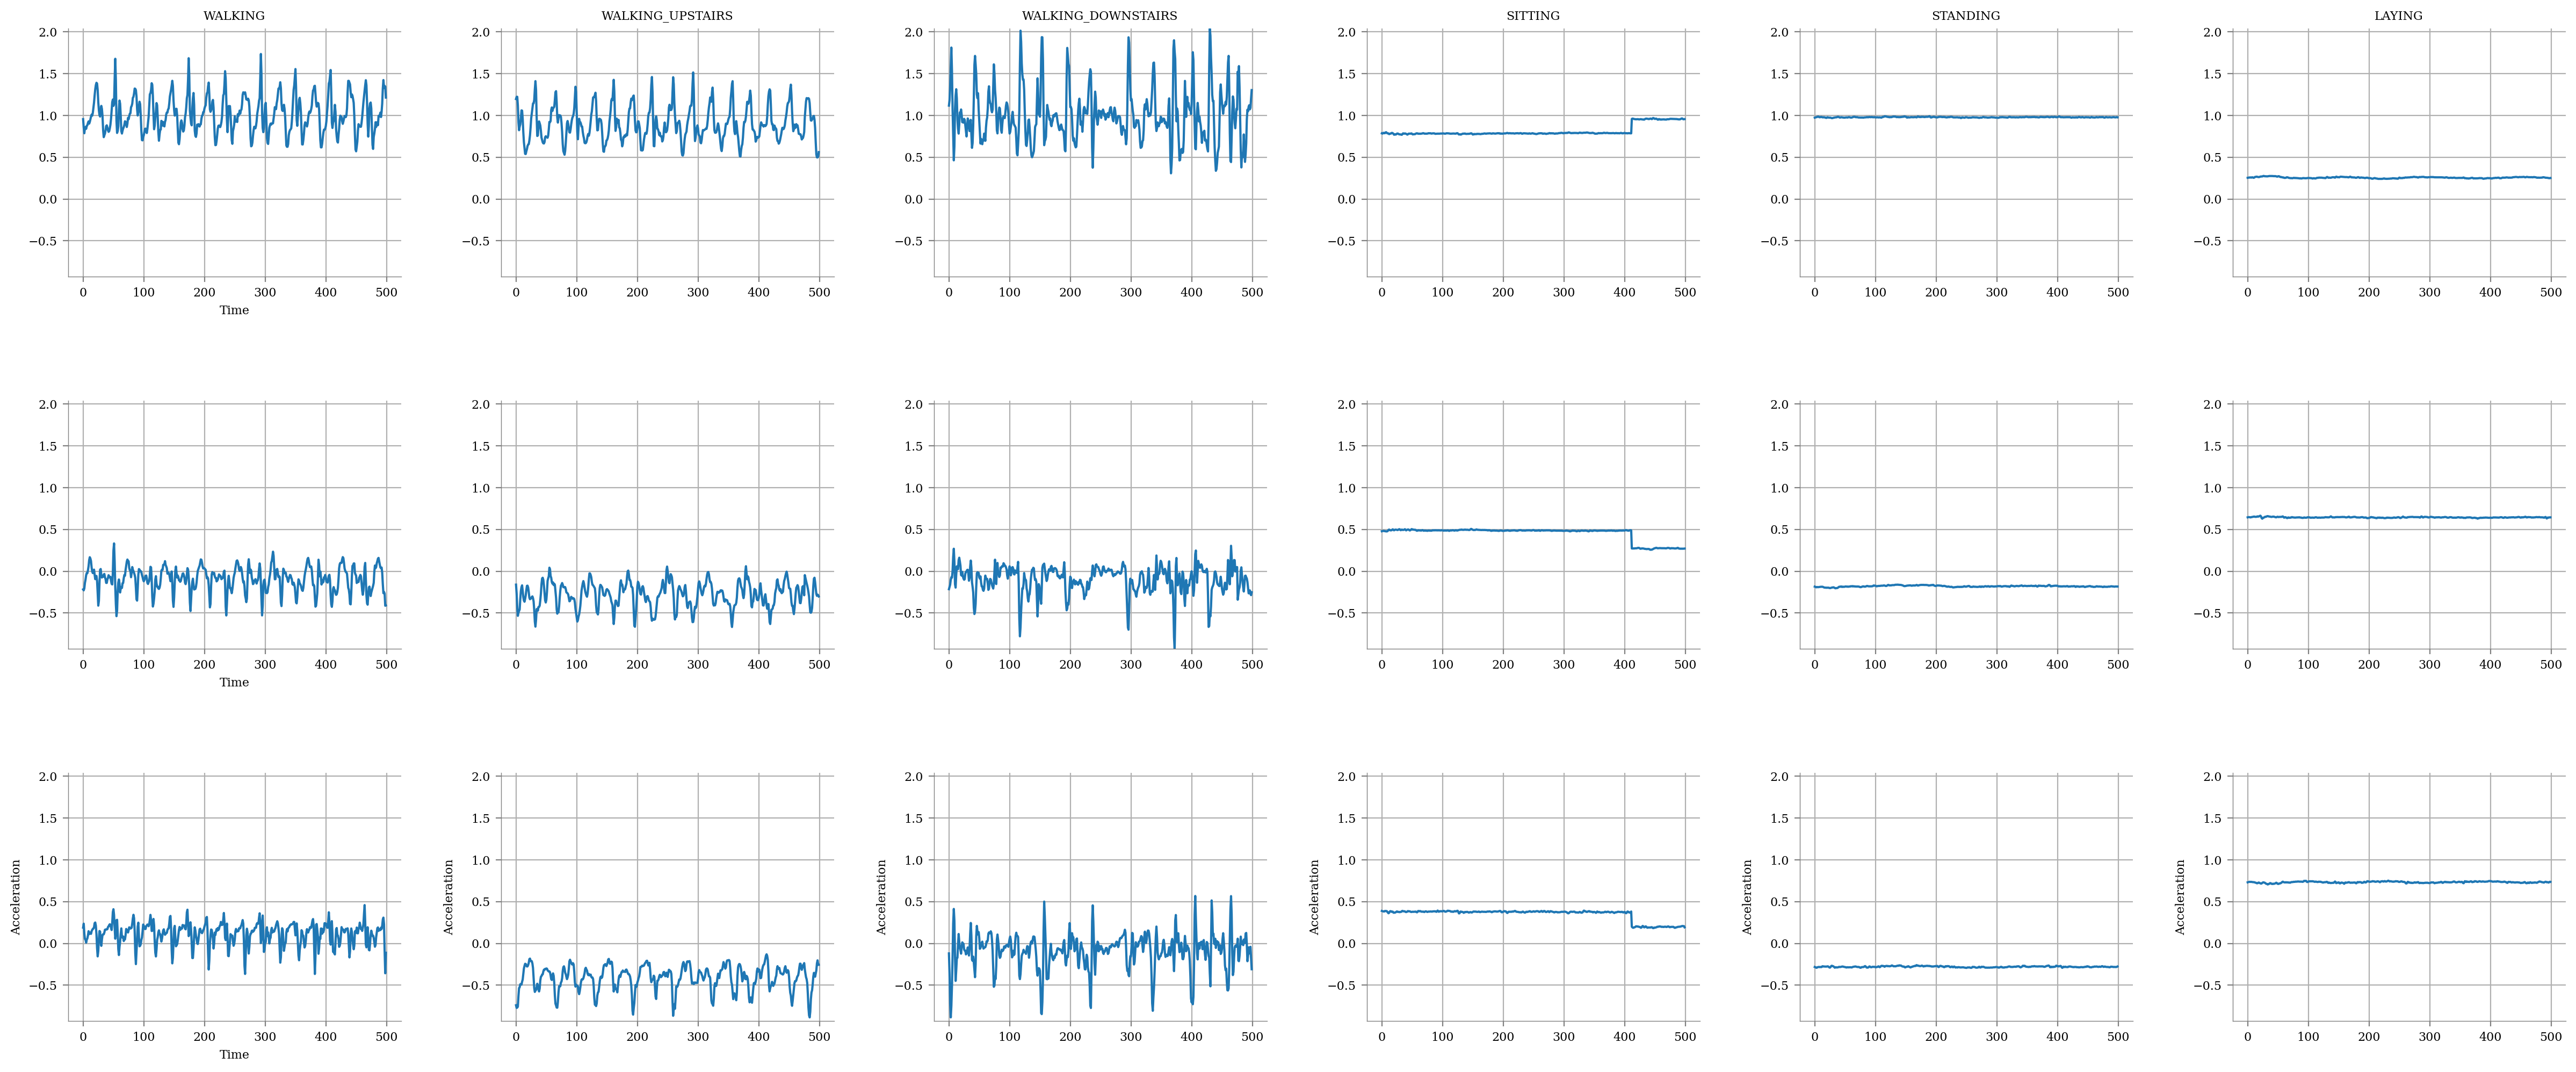

In [14]:
num_dimensions = 3  # For x, y, z
num_activities = len(activity_samples)  # Number of activities

latexify()

# Increase the figure size if needed
fig = plt.figure(figsize=(30, 12))  # Adjust width and height as needed

# Create a GridSpec for a 3x6 plot layout
gs = gridspec.GridSpec(num_dimensions, num_activities, width_ratios=[1] * num_activities, height_ratios=[1] * num_dimensions, hspace=0.5, wspace=0.3) 

axes = [plt.subplot(gs[dim, act]) for dim in range(num_dimensions) for act in range(num_activities)]  # 3x6 subplots

# Convert activity_samples keys to a list
activity_list = list(activity_samples.keys())

# To determine global y-axis limits
all_samples = np.concatenate([sample for sample in activity_samples.values()], axis=0)
global_y_min = np.min(all_samples)
global_y_max = np.max(all_samples)

# Color for individual plots
standard_color = 'tab:blue'

for i, (activity, sample) in enumerate(activity_samples.items()):
    for dim in range(num_dimensions):
        ax = axes[dim * num_activities + i]  # Selecting subplot axis for each dimension
        ax.plot(sample[:, dim], color=standard_color, label=activity)
        if dim == 0:
            ax.set_title(f"{activity}")
        if dim == num_dimensions - 1:
            ax.set_ylabel("Acceleration")
        if i == 0:
            ax.set_xlabel("Time")
        ax.set_ylim(global_y_min, global_y_max)
        format_axes(ax) 

# Set axis labels for the dimensions
for dim in range(num_dimensions):
    for act in range(num_activities):
        ax = axes[dim * num_activities + act]
        ax.grid(True)
        if dim == 0:
            ax.set_title(f"{activity_list[act]}")
        if dim == num_dimensions-1:
            ax.set_ylabel("Acceleration")
        if act == 0:
            ax.set_xlabel("Time")

plt.subplots_adjust(hspace=0.5, wspace=0.3)  # To adjust padding between subplots
plt.show()

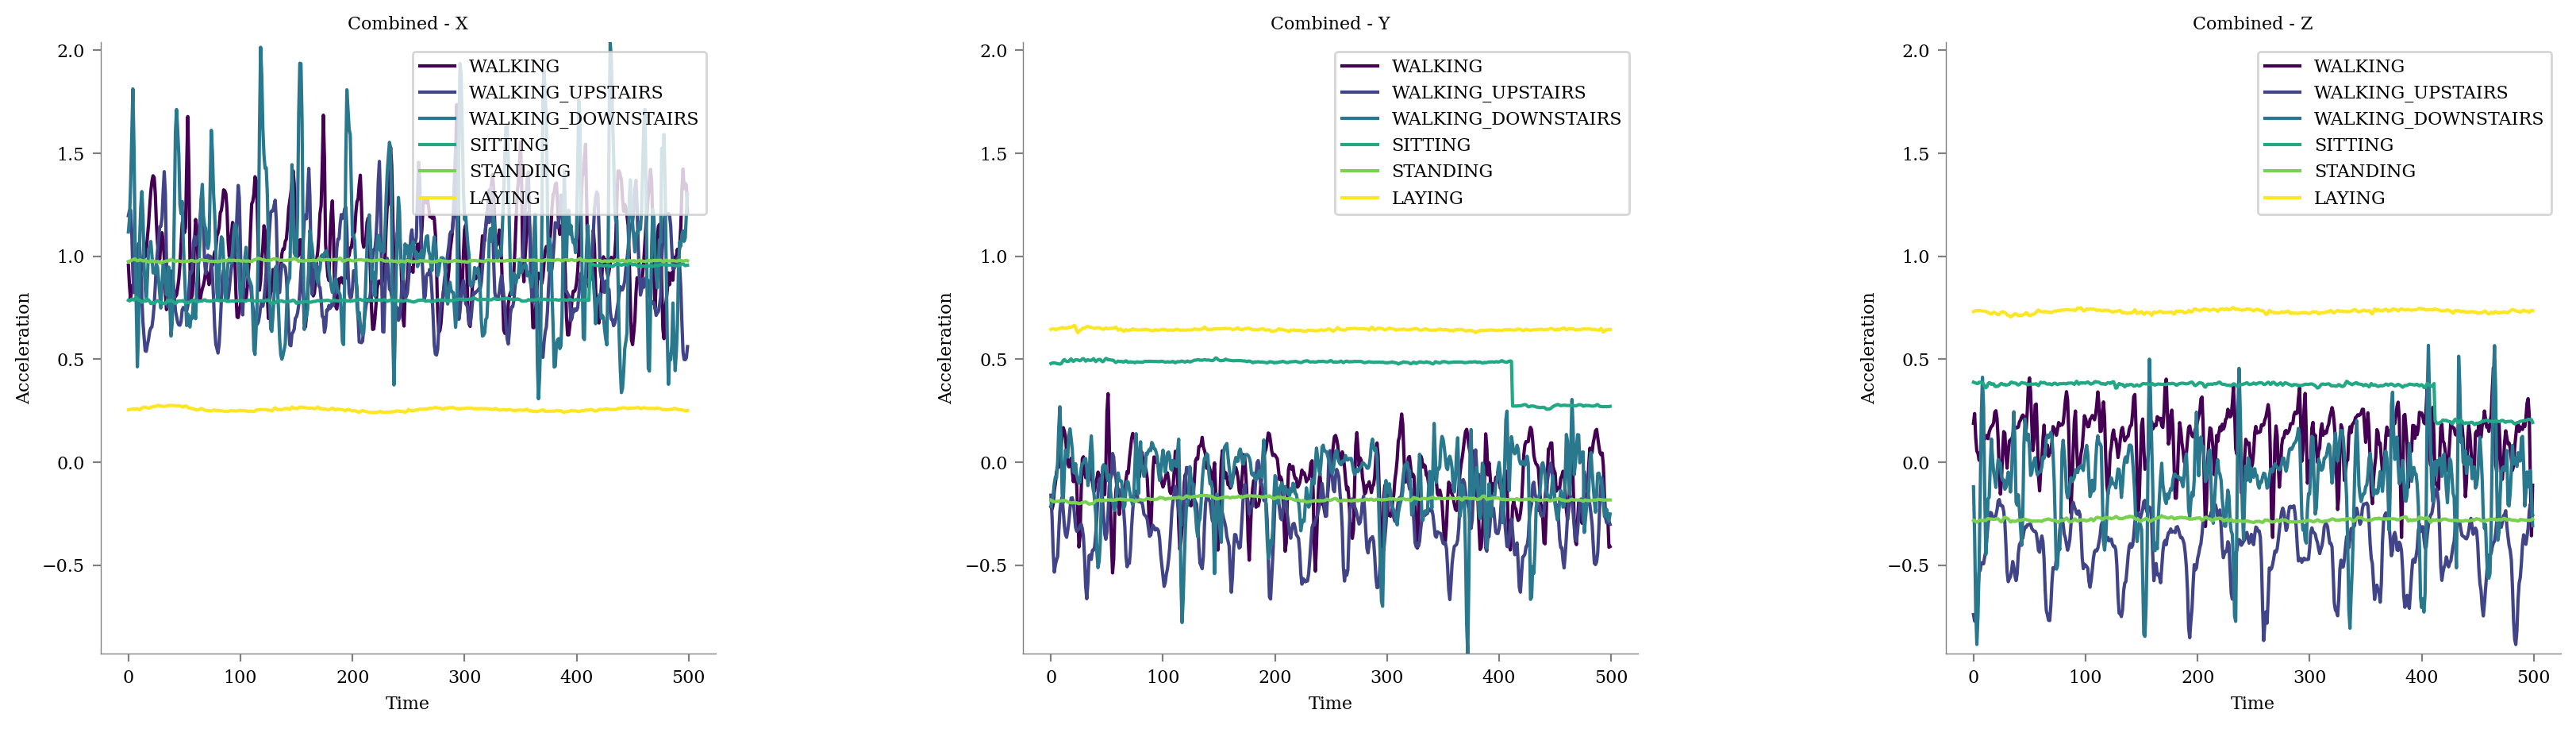

In [15]:
fig = plt.figure(figsize=(20, 5))  # Adjust figsize for the additional row

# GridSpec for combined plots row
gs = gridspec.GridSpec(1, num_dimensions, width_ratios=[1] * num_dimensions, wspace=0.5)

axes_combined = [plt.subplot(gs[0, j]) for j in range(num_dimensions)]  # Additional row for combined plots

# Colors for combined plots
colors_combined = plt.cm.viridis(np.linspace(0, 1, num_activities))

for dim in range(num_dimensions):
    ax = axes_combined[dim]
    for i, (activity, sample) in enumerate(activity_samples.items()):
        ax.plot(sample[:, dim], color=colors_combined[i], label=activity)
    ax.set_title(f"Combined - {'XYZ'[dim]}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Acceleration")
    ax.legend(loc='upper right')
    ax.set_ylim(global_y_min, global_y_max)
    format_axes(ax)

plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust padding between subplots

plt.savefig(os.path.join('../Images', 'waveforms_for_activities_combined.png'), dpi=600, bbox_inches='tight')
plt.show()

The waveforms for different activities in the HAR dataset show noticeable differences. Dynamic activities like walking, walking upstairs, and walking downstairs have several peaks that vary in width and height, making them quite distinct. In contrast, static activities such as sitting, standing, and laying exhibit smoother waveforms with fewer large peaks.

When using a Decision Tree without featurization, the model might not perform well because it treats individual samples as separate features. This approach can lead to inconsistent predictions, especially if the waveform shifts slightly. By featurizing the time series data—such as calculating the mean, variance, and peak characteristics of acceleration in different directions—the Decision Tree can better distinguish between static and dynamic activities. However, it may still face challenges in differentiating between similar static activities like sitting and laying, which have more similar waveforms.

Overall, while Decision Trees can be effective for broad classification tasks with featurized data, their performance might be limited for finer distinctions between similar activities. Exploring models that account for temporal dependencies and sequential patterns might offer improved classification accuracy for the HAR dataset.

# Question 2
Q2. Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities (walking, walking downstairs, walking upstairs)?

Look at the linear acceleration 
 for each activity and justify your answer.

In [16]:
# linear acceleration
linear_acc_train = X_train[:,:,0]**2 + X_train[:,:,1]**2 + X_train[:,:,2]**2
linear_acc_test = X_test[:,:,0]**2 + X_test[:,:,1]**2 + X_test[:,:,2]**2
print("Linear Acceleration Training Data Shape: ", linear_acc_train.shape)
print("Linear Acceleration Testing Data Shape: ", linear_acc_test.shape)

Linear Acceleration Training Data Shape:  (126, 500)
Linear Acceleration Testing Data Shape:  (54, 500)


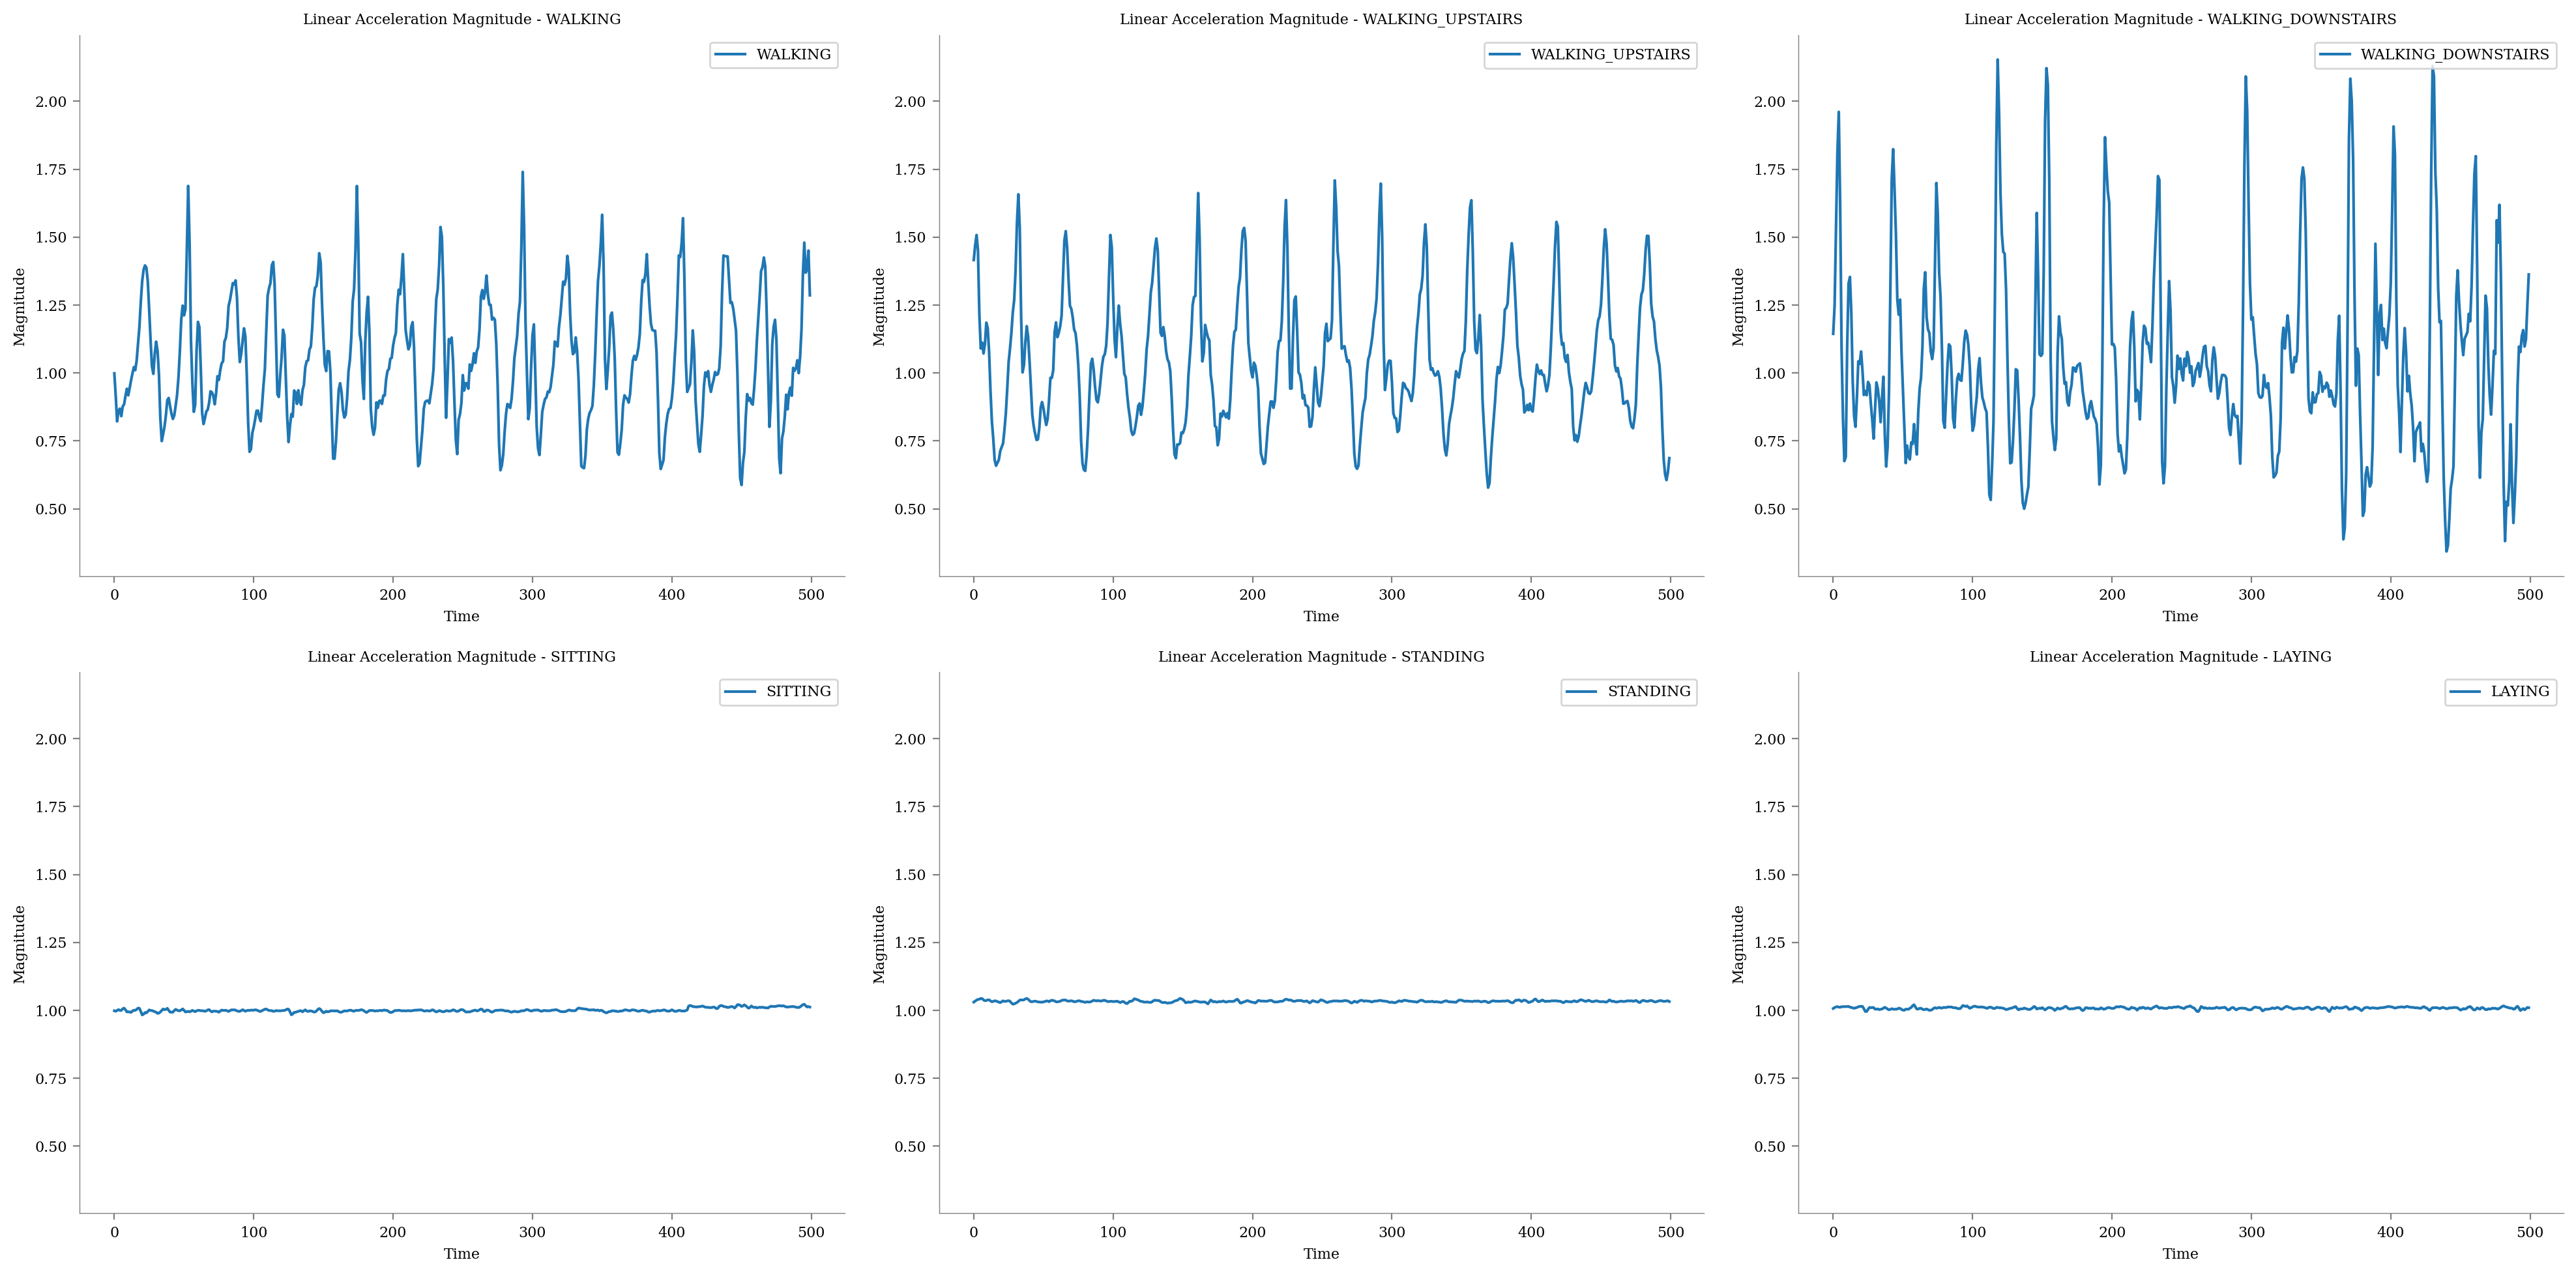

In [17]:
# Calculate linear acceleration magnitude
magnitude_samples = {}
latexify()
for activity, sample in activity_samples.items():
    acc_x = sample[:, 0]
    acc_y = sample[:, 1]
    acc_z = sample[:, 2]
    magnitude = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
    magnitude_samples[activity] = magnitude

num_activities = len(activity_samples)  # Total number of activities (6 in this case)
activity_list = list(magnitude_samples.keys())  # All activities

# Set up figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharex=True, sharey=True)  # 2 rows, 3 columns
standard_color = 'tab:blue'  # Standard color for all plots

for i, activity in enumerate(activity_list):
    magnitude = magnitude_samples[activity]
    row = i // 3  # Determine row index (0 or 1)
    col = i % 3   # Determine column index (0, 1, or 2)
    ax = axes[row, col]
    ax.plot(magnitude, color=standard_color, label=f'{activity}')
    ax.set_title(f'Linear Acceleration Magnitude - {activity}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Magnitude')
    ax.legend(loc='upper right')
    # ax.grid(True)
    format_axes(ax)

plt.tight_layout(pad=2.0)
plt.show()

No, we don't need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities (walking, walking downstairs, walking upstairs). We can visually distinguish between static and dynamic activities by looking at their linear acceleration graphs and the minimum and maximum values of linear acceleration. The linear acceleration for static activities is almost constant at around 1, while for dynamic activities, it continuously varies with higher peaks. We can predict the activity using simple conditional statements based on the maximum and minimum acceleration values.

Although, if computational resources are available, a decision tree can be used to classify between static and dynamic activities by training it on the linear acceleration data.

# Question 3 .Visualize the data using PCA. 

### 3.1 Use PCA (Principal Component Analysis) on Total Acceleration 
 to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.

In [18]:
from sklearn.decomposition import PCA

Shape of the data after PCA: (126, 2)


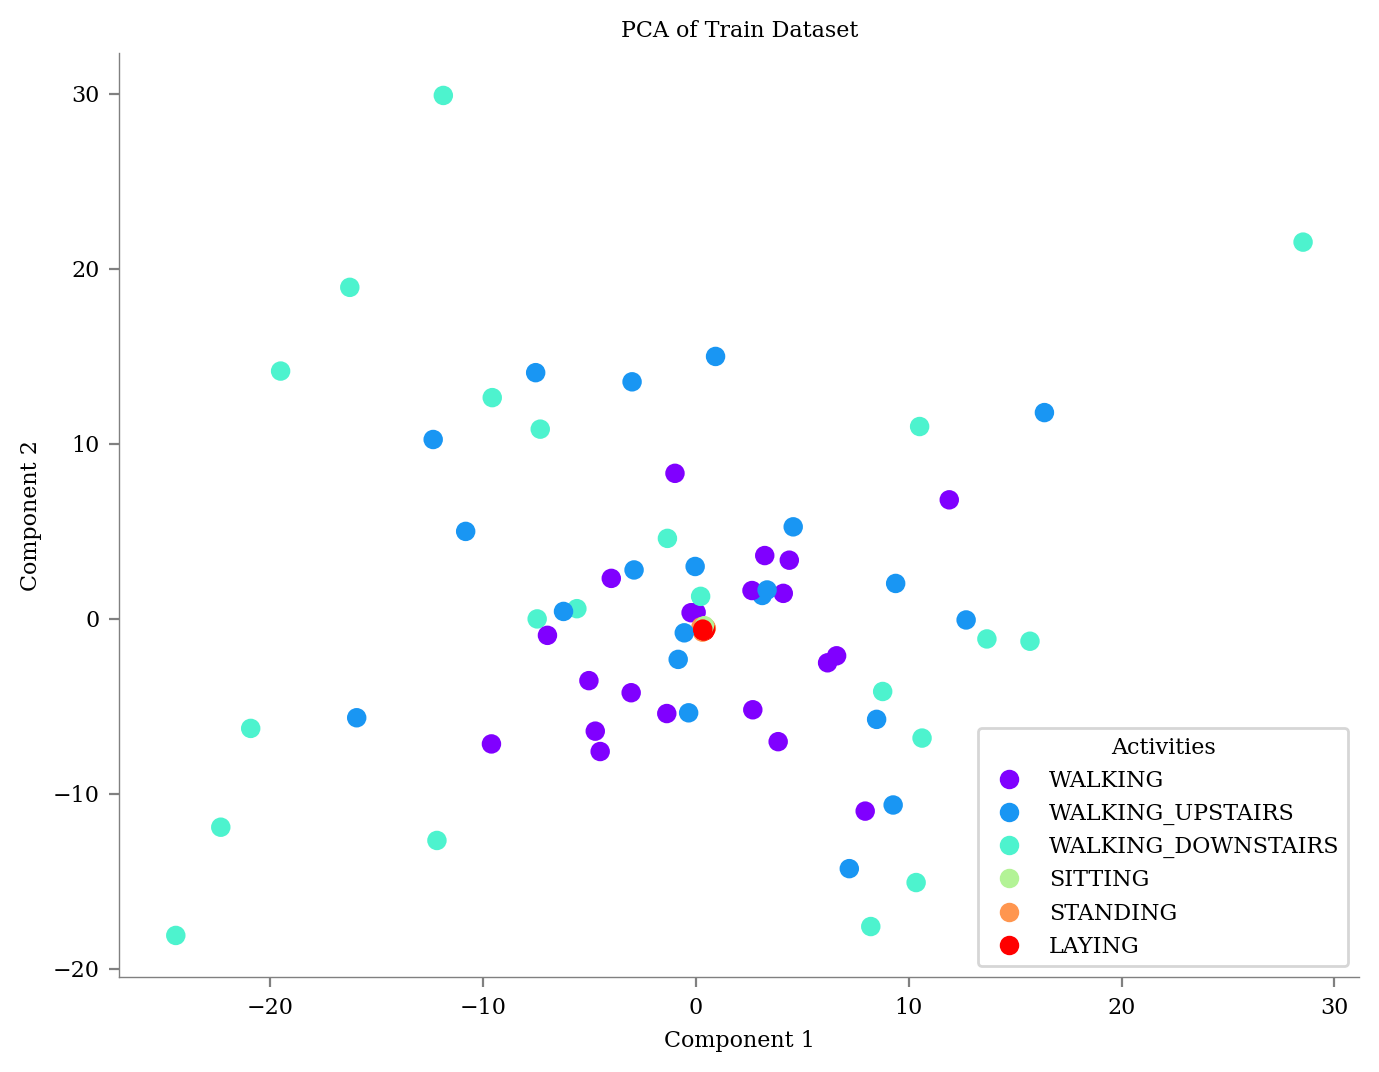

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# standardizing the data before applying PCA
scaler = StandardScaler()
linear_acc_train_standardized = scaler.fit_transform(linear_acc_train)

# applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(linear_acc_train_standardized)
print("Shape of the data after PCA:", X_pca.shape)

# Plotting the PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='rainbow')


legend_labels = [f'{classes[i]}' for i in set(y_train)]
legend_elements = scatter.legend_elements()[0]
legend = plt.legend(legend_elements, legend_labels, title='Activities')

format_axes(plt.gca())
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA of Train Dataset')
plt.show()


### 3.2 Picking features using TSFEL
The features picked are: absolute energy, mean absolute deviation, peak to peak distance, rms, autocorrelation, variance, mean and slope

In [20]:
import tsfel # Featurizer Library

###################################################

In [21]:
# Extract features using TSFEL
cfg = tsfel.get_features_by_domain()  # Get all features by default
features = tsfel.time_series_features_extractor(cfg,X_train, verbose=0,fs =50)
'''
verbose parameter controls the amount of information that is printed out during the execution of the function.
verbose=0: Suppresses all output. No messages will be printed.
verbose=1: Prints basic information, often minimal progress updates.
verbose=2 and above: Prints more detailed information, including potentially extensive logs or debug information.

fs : sampling frequency
'''

'''
When you call tsfel.get_features_by_domain(), it returns a configuration (cfg) that specifies which features to extract from your time series data.
The cfg variable holds the configuration that tells TSFEL which features to compute. This configuration can be customized or retrieved for specific domains.
When you call tsfel.get_features_by_domain(), it retrieves a default configuration that includes a wide variety of features from all domains (time, frequency, and statistical).

Time-domain features: Mean, standard deviation, kurtosis, skewness, etc.
Frequency-domain features: Spectral entropy, power spectral density, etc.
Statistical features: Quantiles, autocorrelation, etc

'''
print(features.shape)
print(features.columns)

(126, 1152)
Index(['0_Absolute energy', '0_Area under the curve', '0_Autocorrelation',
       '0_Average power', '0_Centroid', '0_ECDF Percentile Count_0',
       '0_ECDF Percentile Count_1', '0_ECDF Percentile_0',
       '0_ECDF Percentile_1', '0_ECDF_0',
       ...
       '2_Wavelet variance_0', '2_Wavelet variance_1', '2_Wavelet variance_2',
       '2_Wavelet variance_3', '2_Wavelet variance_4', '2_Wavelet variance_5',
       '2_Wavelet variance_6', '2_Wavelet variance_7', '2_Wavelet variance_8',
       '2_Zero crossing rate'],
      dtype='object', length=1152)


### TSFEL Features Overview

TSFEL provides a comprehensive set of features for time series analysis, grouped into different domains: temporal (time-domain), spectral (frequency-domain), and statistical. Below is a breakdown of key features in each domain.

#### 1. Temporal Features (Time-Domain)
- **Mean**: Average value of the signal.
- **Standard Deviation**: Measure of the signal’s variability.
- **Median**: Middle value of the signal.
- **Maximum**: Maximum value of the signal.
- **Minimum**: Minimum value of the signal.
- **Kurtosis**: Measure of the "tailedness" of the probability distribution.
- **Skewness**: Measure of the asymmetry of the probability distribution.
- **Interquartile Range (IQR)**: Difference between the 75th and 25th percentiles.
- **Root Mean Square (RMS)**: Square root of the mean of the squared values.
- **Autocorrelation**: Correlation of the signal with a delayed copy of itself.
- **Entropy**: Measure of randomness in the signal.
- **Zero Crossing Rate**: The rate at which the signal changes sign.
- **Slope**: Rate of change of the signal.

#### 2. Spectral Features (Frequency-Domain)
- **Spectral Entropy**: Measure of the complexity or randomness of the spectrum.
- **Power Spectral Density (PSD)**: Distribution of power into frequency components.
- **Spectral Centroid**: The "center of mass" of the spectrum.
- **Spectral Bandwidth**: Width of the spectral range in which most of the signal’s energy is concentrated.
- **Spectral Flatness**: Ratio of the geometric mean to the arithmetic mean of the spectrum, indicating how flat or peaked the spectrum is.
- **Dominant Frequency**: The frequency with the highest power in the spectrum.

#### 3. Statistical Features
- **Mean Absolute Deviation (MAD)**: Average of the absolute deviations from the mean.
- **Variance**: Measure of the signal's spread around the mean.
- **Median Absolute Deviation (MAD)**: Median of the absolute deviations from the median.
- **Quantiles**: Values at specific percentiles of the signal.
- **Coefficient of Variation**: Ratio of the standard deviation to the mean.
- **Correlation Coefficient**: Measure of linear correlation between two variables.


In [22]:

#############################################################################

fs =50 # sampling frequency

# Feature extraction
cfg_file = tsfel.get_features_by_domain()  # All features
# cfg_file = tsfel.get_features_by_domain('statistical') # Only statistical features
# cfg_file = tsfel.get_features_by_domain('temporal')    # Only temporal features
# cfg_file = tsfel.get_features_by_domain('spectral')    # Only spectral features

# Get features
X_train_tsfel = tsfel.time_series_features_extractor(cfg_file,X_train, fs=fs)
X_test_tsfel = tsfel.time_series_features_extractor(cfg_file, X_test, fs=fs)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [23]:
# # Highly correlated features are removed
# corr_features = tsfel.correlated_features(X_train_tsfel)
# X_train_tsfel.drop(corr_features, axis=1, inplace=True)
# X_test_tsfel.drop(corr_features, axis=1, inplace=True)

# # Remove low variance features
# selector = VarianceThreshold()
# X_train_tsfel = selector.fit_transform(X_train_tsfel)
# X_test_tsfel = selector.transform(X_test_tsfel)

# # Normalising Features
# scaler = preprocessing.StandardScaler()
# nX_train = scaler.fit_transform(X_train_tsfel)
# nX_test = scaler.transform(X_test_tsfel)

In [24]:
# import glob
# import zipfile

# import numpy as np
# import pandas as pd
# import seaborn as sns
# from matplotlib import pyplot as plt
# from sklearn import preprocessing
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import VarianceThreshold
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # @title Feature Extraction

# fs = 50
# # Feature extraction
# cfg_file = tsfel.get_features_by_domain()  # All features
# # cfg_file = tsfel.get_features_by_domain('statistical') # Only statistical features
# # cfg_file = tsfel.get_features_by_domain('temporal')    # Only temporal features
# # cfg_file = tsfel.get_features_by_domain('spectral')    # Only spectral features

# # Get features
# X_train_tsfel = tsfel.time_series_features_extractor(cfg_file, X_train, fs=fs)
# X_test_tsfel = tsfel.time_series_features_extractor(cfg_file, X_test, fs=fs)

# # Remove highly correlated features (keep this step before VarianceThreshold)
# corr_features = tsfel.correlated_features(X_train_tsfel)
# X_train_tsfel.drop(corr_features, axis=1, inplace=True)
# X_test_tsfel.drop(corr_features, axis=1, inplace=True)

# # Remove low variance features
# selector = VarianceThreshold()
# X_train_tsfel = selector.fit_transform(X_train_tsfel)
# X_test_tsfel = selector.transform(X_test_tsfel)

# # Normalising Features
# scaler = preprocessing.StandardScaler()
# nX_train = scaler.fit_transform(X_train_tsfel)
# nX_test = scaler.transform(X_test_tsfel)


In [25]:
# num_features = X_train_tsfel.shape[1]
# print(f"Number of features extracted: {num_features}")


In [26]:
# feature_names = X_train_tsfel.columns.tolist()
# print("Extracted feature names:")
# for feature in feature_names:
#     print(feature)


In [27]:
# # Apply PCA to reduce to 2 components
# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(nX_train)
# X_test_pca = pca.transform(nX_test)

# # Create a scatter plot with a legend
# plt.figure(figsize=(8, 6))

# # Define unique activities and their corresponding colors
# activities = np.unique(y_train)
# colors = plt.cm.viridis(np.linspace(0, 1, len(activities)))

# # Plot each activity with a different color and label
# for activity, color in zip(activities, colors):
#     plt.scatter(X_train_pca[y_train == activity, 0], 
#                 X_train_pca[y_train == activity, 1], 
#                 label=activity, 
#                 color=color, 
#                 edgecolor='k', 
#                 s=40)

# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of Training Data')
# plt.legend(title='Activity')
# plt.show()

### Testing

In [28]:
# import glob
# import zipfile

# import numpy as np
# import pandas as pd
# import seaborn as sns
# from matplotlib import pyplot as plt
# from sklearn import preprocessing
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import VarianceThreshold
# from sklearn.decomposition import PCA
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # @title Feature Extraction

# fs = 50
# # Feature extraction
# cfg_file = tsfel.get_features_by_domain()  # All features
# # cfg_file = tsfel.get_features_by_domain('statistical') # Only statistical features
# # cfg_file = tsfel.get_features_by_domain('temporal')    # Only temporal features
# # cfg_file = tsfel.get_features_by_domain('spectral')    # Only spectral features

# # Get features
# X_train_tsfel = tsfel.time_series_features_extractor(cfg_file, X_train, fs=fs)
# X_test_tsfel = tsfel.time_series_features_extractor(cfg_file, X_test, fs=fs)

# # Inspect features before applying VarianceThreshold
# num_features = X_train_tsfel.shape[1]
# feature_names = X_train_tsfel.columns.tolist()

# print(f"Number of features extracted: {num_features}")
# print("Extracted feature names:")
# for feature in feature_names:
#     print(feature)

# # Remove highly correlated features (keep this step before VarianceThreshold)
# corr_features = tsfel.correlated_features(X_train_tsfel)
# X_train_tsfel.drop(corr_features, axis=1, inplace=True)
# X_test_tsfel.drop(corr_features, axis=1, inplace=True)

# # Remove low variance features
# selector = VarianceThreshold()
# X_train_tsfel = selector.fit_transform(X_train_tsfel)
# X_test_tsfel = selector.transform(X_test_tsfel)

# # Normalising Features
# scaler = preprocessing.StandardScaler()
# nX_train = scaler.fit_transform(X_train_tsfel)
# nX_test = scaler.transform(X_test_tsfel)

# # Apply PCA to reduce to 2 components
# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(nX_train)
# X_test_pca = pca.transform(nX_test)
